<a href="https://colab.research.google.com/github/sreeja2208/assignments/blob/main/M3L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#M3L1
#decision trees

In [2]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix

## **Section 1 - Classification with Decision Trees**

- What is a decision tree and how is a DT used to made a prediction.
- How the complexity of tree effects its performance. (An example where increasing the complexity improves the performance.)
- Notion of Entropy and Information Gain and how they can be used to create a tree.
- Nature of decision boundaries made by DTs.


**Decision Trees** are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of some property by inferring simple decision rules from the data features.

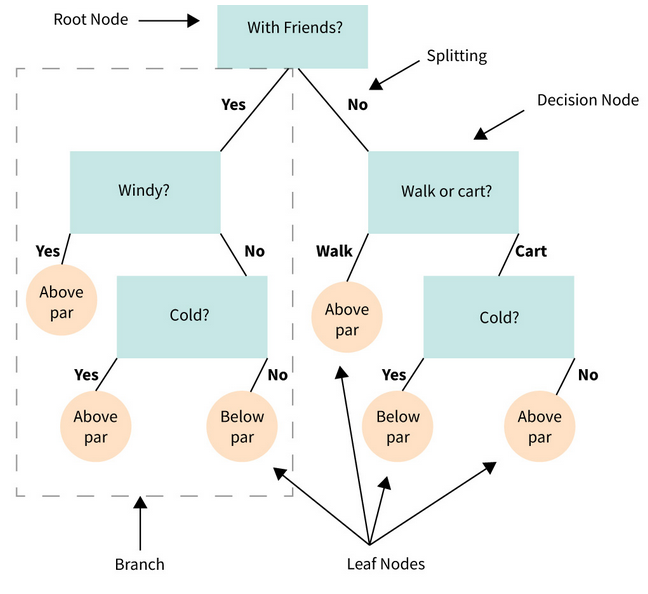


Moving on to a hand-on example, let us take a look at an example of a decision tree which predicts the class of the species of Iris flower from the iris dataset.

### Code for the core experiment: 

- Creating the decision tree classifier based on parameters passed.
- Evaluating the classifier's accuracy and plotting its confusion matrix.
- Plotting its decision boundary.
- Creating and showing the visualization of the tree made.

**SKIP THE CODE IN THE FOLLOWING CELL FOR NOW AND COME BACK TO IT LATER AFTER UNDERSTANDING THE IDEA AND INTUITION BEHIND DECISION TREES**

In [3]:
def performExperiment(trainSet:tuple,testSet:tuple,max_depth:int=None,feature_names:list=None,class_names:list=None,criterion='gini',min_samples_split:int=2,min_samples_leaf=1):
  clf=tree.DecisionTreeClassifier(max_depth=max_depth,\
                                  criterion=criterion,\
                                  min_samples_split=min_samples_split,\
                                  min_samples_leaf=min_samples_leaf,\
                                  splitter='best',
                                  random_state=0,\
                                  )
  x_train,y_train=trainSet
  x_test,y_test=testSet
  clf=clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  print("Accuracy of the decision tree on the test set:\n\n{:.3f}\n\n".format(accuracy_score(y_pred,y_test)))
  print("The confusion matrix is:")
  plot_confusion_matrix(clf,x_test,y_test,display_labels=class_names)
  print("Here s the digram of tree created to evaluate each sample:")
  fig,ax=plt.subplots(figsize=(10,12))
  imgObj=tree.plot_tree(clf,filled=True,ax=ax,feature_names=feature_names,class_names=class_names,impurity=False,proportion=True,rounded=True,fontsize=12)
  plt.show()

def giveAnExample(n:int):
  performExperiment((x_train,y_train),(x_test,y_test),feature_names=iris['feature_names'],class_names=iris['target_names'],max_depth=n)

def plotDecisionBoundary(x,y,pair,clf):
  x_min,x_max=x[:,pair[0]].min()-1,x[:,pair[0]].max()+1
  y_min,y_max=x[:,pair[1]].min()-1,x[:,pair[1]].max()+1
  xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
  y_pred=clf.predict(np.c_[xx.ravel(),yy.ravel()])
  y_pred=y_pred.reshape(xx.shape)
  plt.figure(figsize=(8,6))
  plt.contourf(xx,yy,y_pred,aplha=0.4)
  plt.scatter(x[:,pair[0]],x[:,pair[1]],c=y,s=50,edgecolor='k')
  plt.show()

## Loading IRIS Dataset:

### About the IRIS dataset:

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). We shall be using decision trees to try to predict the correct species of the flower using these four features

In [4]:
iris=load_iris()
x,y=iris.data,iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
irisData=pd.DataFrame(\
                     data=np.hstack((x,y.reshape(y.shape[0],1),[[iris["target_names"][int(classIdx)]] for classIdx in y])),\
                      columns=["sepal_length","sepal_width","petal_length","petal_width","Class","Classname"])
irisData.sample(n=10,random_state=1)
# Here is a few samples: The dataset has 4 non-catagorical features and a class which can take of one of the three values

,sepal_length,sepal_width,petal_length,petal_width,Class,Classname
14,5.8,4.0,1.2,0.2,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
131,7.9,3.8,6.4,2.0,2,virginica
56,6.3,3.3,4.7,1.6,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
120,6.9,3.2,5.7,2.3,2,virginica


## Example of DT on Iris dataset with performace evaluation, and tree structure

Accuracy of the decision tree on the test set:

0.895


The confusion matrix is:
Here s the digram of tree created to evaluate each sample:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


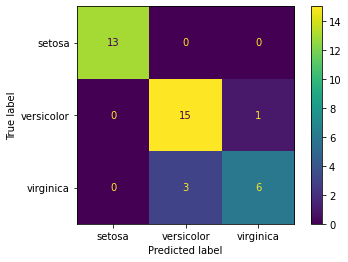

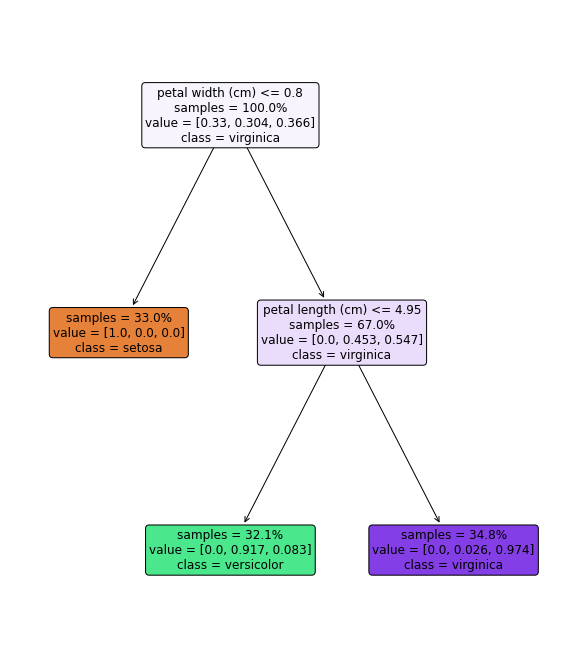

In [5]:
giveAnExample(2)
#89.5% are correctly classified

Accuracy of the decision tree on the test set:

0.895


The confusion matrix is:
Here s the digram of tree created to evaluate each sample:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


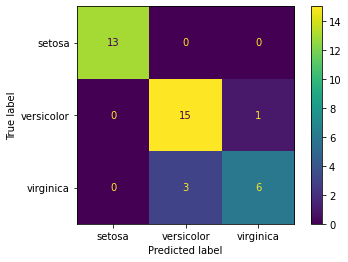

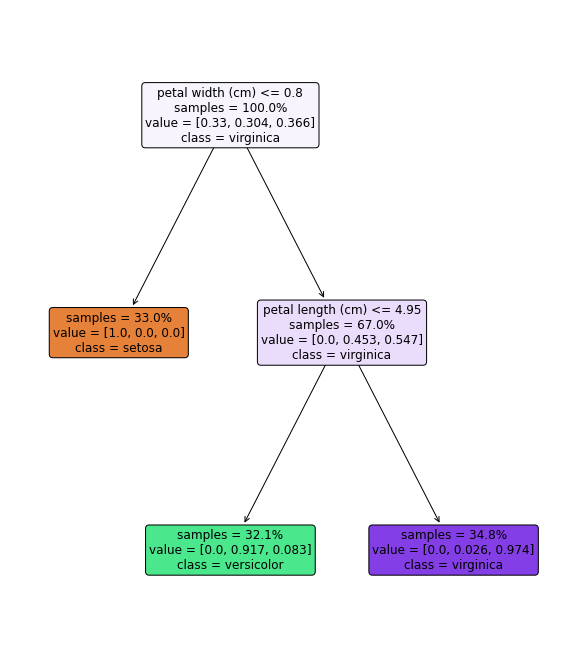

In [6]:
irisData.sample(n=5,random_state=0)
giveAnExample(2)

Accuracy of the decision tree on the test set:

0.974


The confusion matrix is:
Here s the digram of tree created to evaluate each sample:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


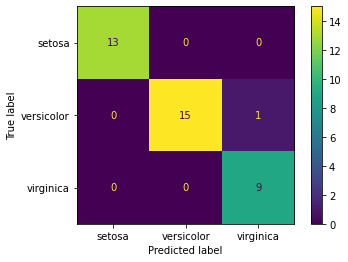

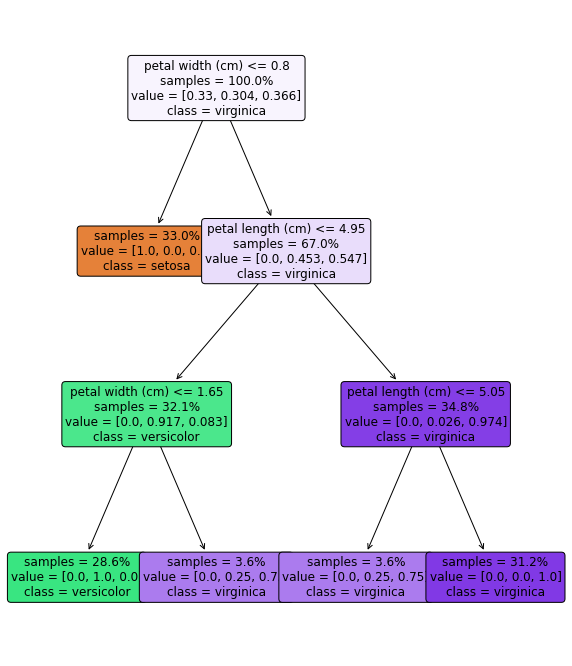

In [7]:
giveAnExample(3)
#97.4% are correctly classified

We observe that even though that the tree had four features available to it, the tree uses only two of them to classify the cases of species. It gives us an idea that those two features chosen are performing quite decently. Let us examine the decision boundary generated by the tree when only those two features namely **petal length and petal width** are used

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'aplha'


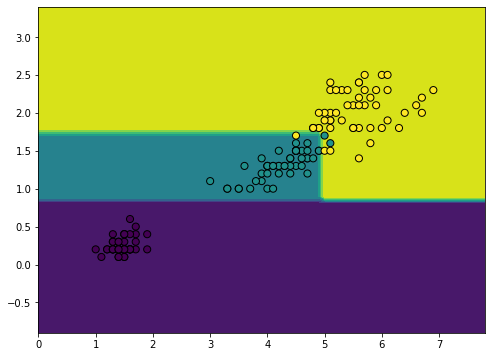

In [8]:
#decision boundary with petal length and petal width
clf=tree.DecisionTreeClassifier(random_state=0,max_depth=3)
pair=[2,3]
clf.fit(x[:,pair],y)
plotDecisionBoundary(x,y,[2,3],clf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'aplha'


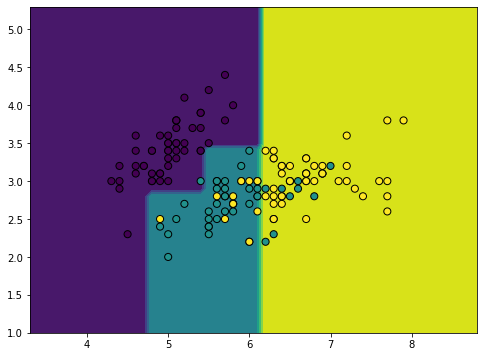

In [9]:
#decision boundary with sepal width and length
clf=tree.DecisionTreeClassifier(random_state=0,max_depth=3)
pair=[0,1]
clf.fit(x[:,pair],y)
plotDecisionBoundary(x,y,pair,clf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'aplha'


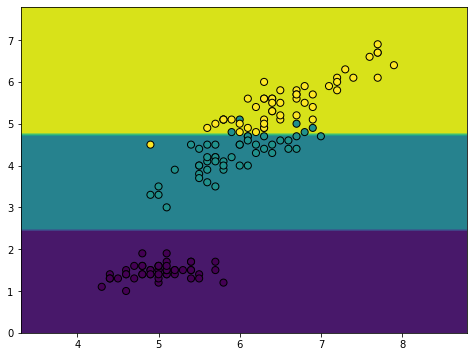

In [10]:
#decision boundary with sepal length and petal length
clf=tree.DecisionTreeClassifier(random_state=0,max_depth=3)
pair=[0,2]
clf.fit(x[:,pair],y)
plotDecisionBoundary(x,y,pair,clf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'aplha'


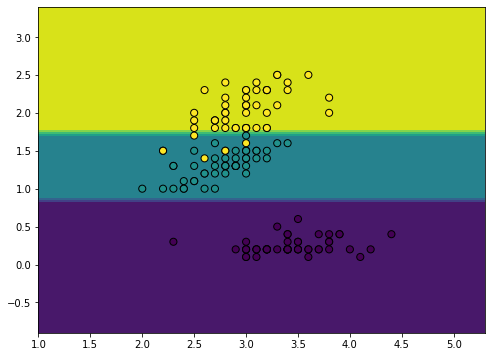

In [11]:
#decision boundary with sepal width and petal width
clf=tree.DecisionTreeClassifier(random_state=0,max_depth=3)
pair=[1,3]
clf.fit(x[:,pair],y)
plotDecisionBoundary(x,y,pair,clf)

---

### Exercise 3:

#### 3.1 :
We see that the above decision boundaries are with depth of 3. Compare the above boundary with trees that have higher complexity (by changing the value of `max_depth`) and then pause and ponder.

Test with `max_depth` of the following values:
- 2
- 5
- 10


What do you observe?

#### 3.2 :

On a closer look, we see that the decision boundaries' lines are always at a right angle to the principle axes. Can you reason on why is that the case? \
`(Hint: How is a decision made at any node?)`

---

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'aplha'


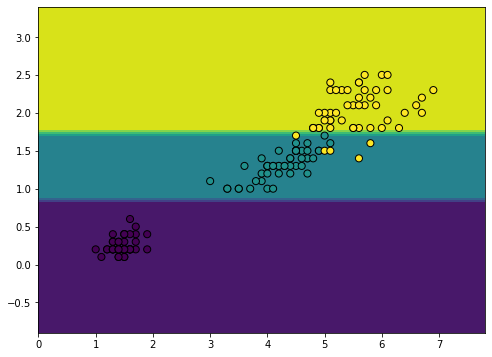

In [12]:
#max_depth=2
#decision boundary with petal length and petal width
clf=tree.DecisionTreeClassifier(random_state=0,max_depth=2)
pair=[2,3]
clf.fit(x[:,pair],y)
plotDecisionBoundary(x,y,[2,3],clf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'aplha'


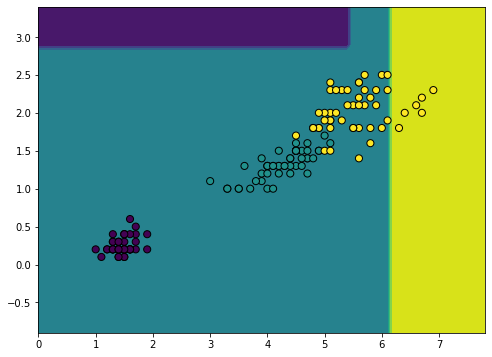

In [13]:
#decision boundary with sepal length and sepal width
clf=tree.DecisionTreeClassifier(random_state=0,max_depth=2)
pair=[0,1]
clf.fit(x[:,pair],y)
plotDecisionBoundary(x,y,[2,3],clf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'aplha'


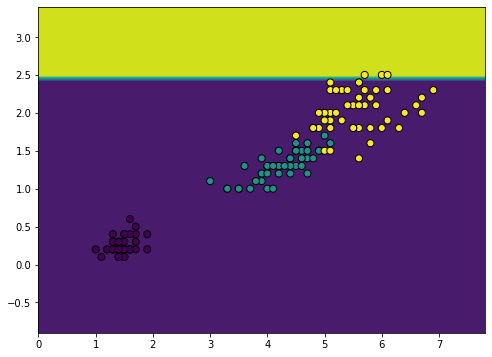

In [14]:
#decision boundary with sepal length and petal length
clf=tree.DecisionTreeClassifier(random_state=0,max_depth=2)
pair=[0,2]
clf.fit(x[:,pair],y)
plotDecisionBoundary(x,y,[2,3],clf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'aplha'


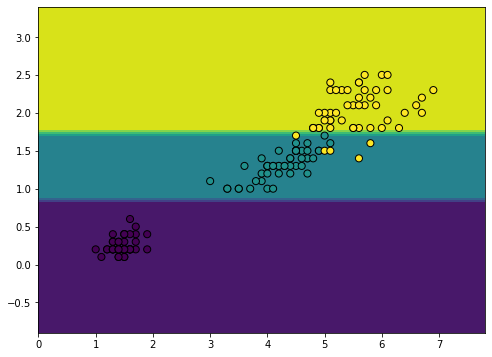

In [15]:
#decision boundary with sepal width and petal width
clf=tree.DecisionTreeClassifier(random_state=0,max_depth=2)
pair=[1,3]
clf.fit(x[:,pair],y)
plotDecisionBoundary(x,y,[2,3],clf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'aplha'


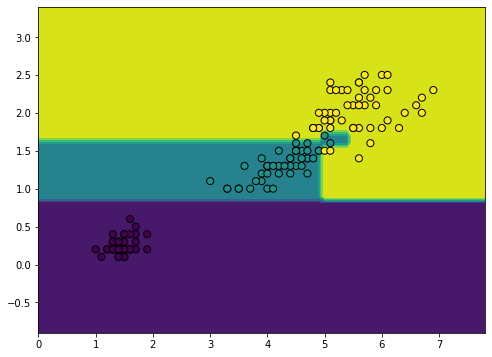

In [16]:
#max_depth=5
#decision boundary with petal length and petal width
clf=tree.DecisionTreeClassifier(random_state=0,max_depth=5)
pair=[2,3]
clf.fit(x[:,pair],y)
plotDecisionBoundary(x,y,[2,3],clf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'aplha'


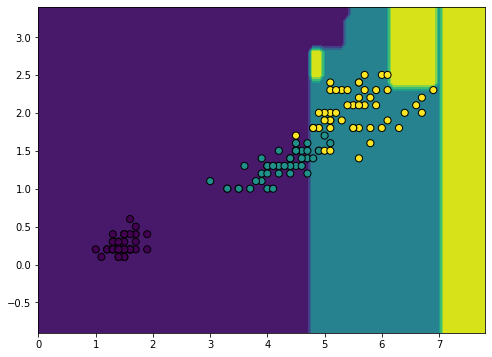

In [17]:
#decision boundary with sepal length and sepal width
clf=tree.DecisionTreeClassifier(random_state=0,max_depth=5)
pair=[0,1]
clf.fit(x[:,pair],y)
plotDecisionBoundary(x,y,[2,3],clf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'aplha'


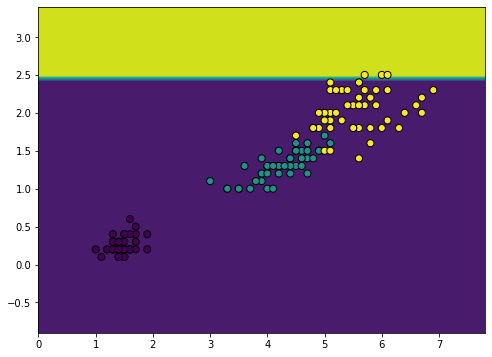

In [18]:
#decision boundary with sepal length and petal length
clf=tree.DecisionTreeClassifier(random_state=0,max_depth=5)
pair=[0,2]
clf.fit(x[:,pair],y)
plotDecisionBoundary(x,y,[2,3],clf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'aplha'


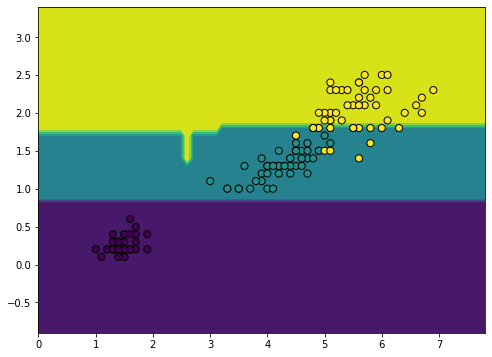

In [19]:
#decision boundary with sepal width and petal width
clf=tree.DecisionTreeClassifier(random_state=0,max_depth=5)
pair=[1,3]
clf.fit(x[:,pair],y)
plotDecisionBoundary(x,y,[2,3],clf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'aplha'


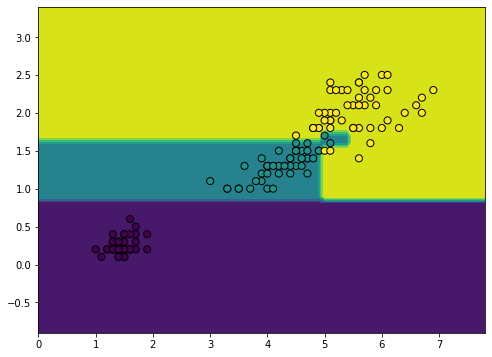

In [20]:
#max_depth=10
#max_depth=5
#decision boundary with petal length and petal width
clf=tree.DecisionTreeClassifier(random_state=0,max_depth=10)
pair=[2,3]
clf.fit(x[:,pair],y)
plotDecisionBoundary(x,y,[2,3],clf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'aplha'


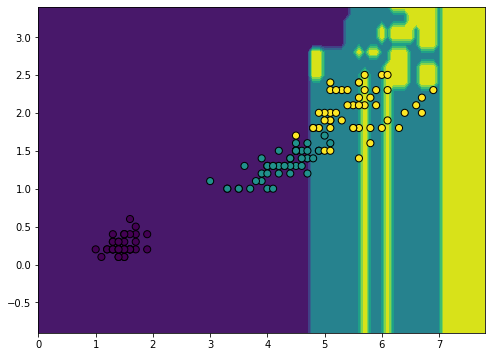

In [21]:
#decision boundary with sepal length and sepal width
clf=tree.DecisionTreeClassifier(random_state=0,max_depth=10)
pair=[0,1]
clf.fit(x[:,pair],y)
plotDecisionBoundary(x,y,[2,3],clf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'aplha'


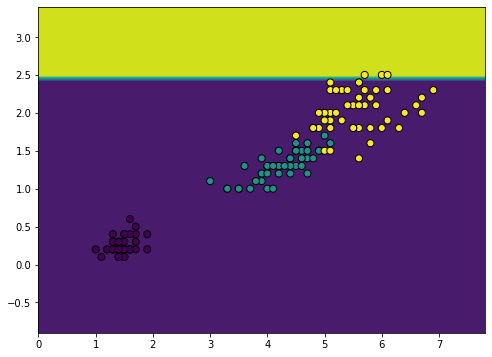

In [22]:
#decision boundary with sepal length and petal length
clf=tree.DecisionTreeClassifier(random_state=0,max_depth=10)
pair=[0,2]
clf.fit(x[:,pair],y)
plotDecisionBoundary(x,y,[2,3],clf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'aplha'


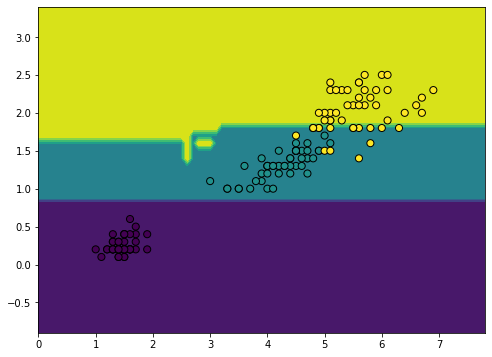

In [23]:
#decision boundary with sepal width and petal width
clf=tree.DecisionTreeClassifier(random_state=0,max_depth=10)
pair=[1,3]
clf.fit(x[:,pair],y)
plotDecisionBoundary(x,y,[2,3],clf)

In [24]:
#the decision tree is not always the best when max_depth is increased,the accuracy might increase or decrease based on the samples
#at a node the decision made is one of the leaf nodes to it,so there is not analog thing to it(like 1.3 or 3.4),it is always digital(like 1 or 2 or 3)
#that is why the boundaries are always at right angles

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy of the decision tree on the test set:

0.974


The confusion matrix is:
Here s the digram of tree created to evaluate each sample:


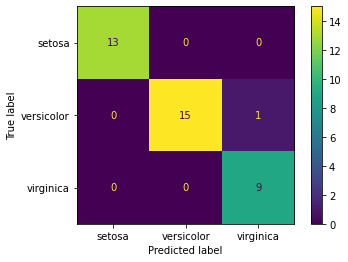

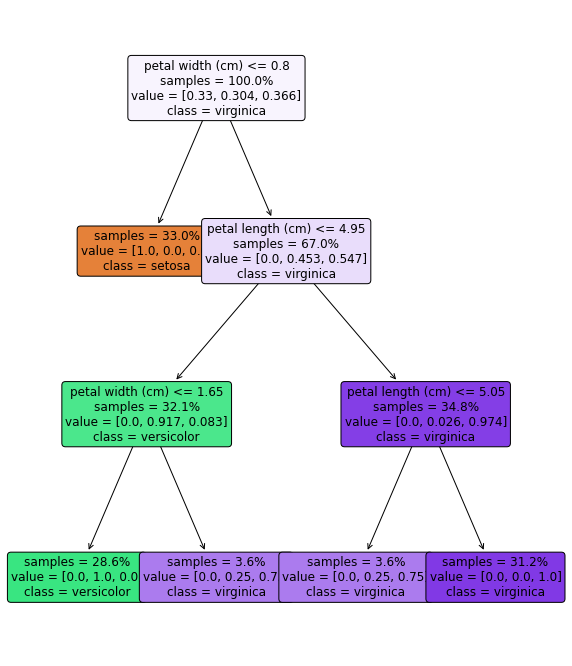

In [25]:
giveAnExample(3)

In [26]:
def predictSpecies(speal_width,speal_length,petal_width,petal_length)->str:
  if(petal_width<=0.8):
    return "setosa"
  elif(petal_length<=4.95):
    if(petal_width<1.65):
      return "versicolor"
    else:
      return "vinginica"  
  else:
    if(petal_length<=5.05):
      return "virginica"
    else:
      return "virginica"  

## Entropy and Information:

### How are decision trees built? 

A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous). 
We use entropy to calculate the homogeneity of a sample.

Entropy itself is defined in the following way:

$$E(s) = \sum_{i=1}^c - p_i * log_2(p_i)$$

Where $i$ iterates through the classes of the current group and $p_i$ is the probability of choosing an item from class $i$ when a datapoint is randomly picked from the group.

At anypoint in the process of making the decision tree. All possible methods of dividing the group are considered (across all features and values of separations) and then the division with the most amount of **Information Gain** is used to divide the current group into two. This is done recursively to finally attain a tree. 

Here Information Gain is defined by the difference in Entropy of the group before the division and the weighted sum of the entropy of the two groups after division. 

$$IG(X) = E(s) - E(s, X)$$

In [27]:
df=irisData.sample(n=10,random_state=15)
df

,sepal_length,sepal_width,petal_length,petal_width,Class,Classname
6,4.6,3.4,1.4,0.3,0,setosa
61,5.9,3.0,4.2,1.5,1,versicolor
90,5.5,2.6,4.4,1.2,1,versicolor
30,4.8,3.1,1.6,0.2,0,setosa
31,5.4,3.4,1.5,0.4,0,setosa
55,5.7,2.8,4.5,1.3,1,versicolor
109,7.2,3.6,6.1,2.5,2,virginica
98,5.1,2.5,3.0,1.1,1,versicolor
59,5.2,2.7,3.9,1.4,1,versicolor
103,6.3,2.9,5.6,1.8,2,virginica


In [28]:
import math
y=df['Class']
z=y.value_counts()
p=q=r=0
for i in range(0,z.size):
  p+=z[i]
for i in range(0,z.size):
  q=z[i]/p
  r+=(-q)*math.log2(q)
es=r
es

1.4854752972273344

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 6 to 103
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sepal_length  10 non-null     object
 1   sepal_width   10 non-null     object
 2   petal_length  10 non-null     object
 3   petal_width   10 non-null     object
 4   Class         10 non-null     object
 5   Classname     10 non-null     object
dtypes: object(6)
memory usage: 560.0+ bytes


In [30]:
#first division 
#petal_length <= 3.62
df['petal_length']=df.petal_length.astype(float)
df1=df.loc[df['petal_length']<=3.62]
df2=df.loc[df['petal_length']>3.62]

In [31]:
df1
#one versicolor and 3 setosa
y=df1['Class']
z=y.value_counts()
p=q=r=0
for i in range(0,z.size):
  p+=z[i]
for i in range(0,z.size):
  q=z[i]/p
  r+=(-q)*math.log2(q)
es11=(df1.size/df.size)*r 
es11

0.32451124978365314

In [32]:
df2
#4 versicolor , 2 virginica
y=df2['Class']
z=y.value_counts()
p=q=r=0
for i in range(0,z.size):
  p+=z[i]
for i in range(0,z.size):
  q=z[i]/p
  r+=(-q)*math.log2(q)
es12=(df2.size/df.size)*r 
es12

0.5509775004326937

In [33]:
ifg1=es-es11-es12
ifg1

0.6099865470109876

In [34]:
#second division 
#sepal_width <= 3.61
df['sepal_width']=df.sepal_width.astype(float)
df1=df.loc[df['sepal_width']<=3]
df2=df.loc[df['sepal_width']>3]

In [35]:
df1
# 5 versicolor and 1 virginica
y=df1['Class']
z=y.value_counts()
p=q=r=0
for i in range(0,z.size):
  p+=z[i]
for i in range(0,z.size):
  q=z[i]/p
  r+=(-q)*math.log2(q)
es21=(df1.size/df.size)*r 
es21

0.39001345298901247

In [36]:
df2
# 3 setosa and 1 virginica
y=df2['Class']
z=y.value_counts()
p=q=r=0
for i in range(0,z.size):
  p+=z[i]
for i in range(0,z.size):
  q=z[i]/p
  r+=(-q)*math.log2(q)
es22=(df2.size/df.size)*r 
es22

0.32451124978365314

In [37]:
ifg2=es-es21-es22
ifg2

0.7709505944546688

In [38]:
if(ifg1>ifg2):
  print('first division is better')
elif(ifg1<ifg2):
  print('second division is better')

second division is better


## **Section 2 - DT Learning**

- Introduction to Gini Index and how can it be used to create decision tree.
- Curse of Overfitting and how it affects decision trees.
- Application of Decision Trees on a real dataset and further experiments.

In [39]:
#changing function for section2
def performExperiment(trainSet:tuple,testSet:tuple,max_depth:int=None,feature_names:list=None,class_names:list=None,criterion='gini',min_samples_split:int=2,min_samples_leaf=1,drawTree=(8,6)):
  clf=tree.DecisionTreeClassifier(max_depth=max_depth,\
                                  criterion=criterion,\
                                  min_samples_split=min_samples_split,\
                                  min_samples_leaf=min_samples_leaf,\
                                  random_state=0,\
                                  )
  x_train,y_train=trainSet
  x_test,y_test=testSet

  clf=clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)

  print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred,y_test)))
  print("the confusion matrix is:")
  fig,ax=plt.subplots(figsize=(3,3))
  plot_confusion_matrix(clf,x_test,y_test,display_labels=class_names,ax=ax)
  plt.show()

  if drawTree:
    print("here is the diagram of the tree created to evaluate each sample:")
    fig,ax=plt.subplots(figsize=drawTree)
    imgObj=tree.plot_tree(clf,filled=True,ax=ax,feature_names=feature_names,class_names=class_names,impurity=False,proportion=True,rounded=True,fontsize=10)
    plt.show()

def returnAccuracy(trainSet:tuple,testSet:tuple,max_depth:int=None,feature_names:list=None,class_names:list=None,criterion='gini',min_samples_split:int=2,min_samples_leaf=1):
  clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0)          
  x_train,y_train=trainSet
  x_test,y_test=testSet
   
  clf=clf.fit(x_train,y_train) 
  y_pred=clf.predict(x_test)

  return accuracy_score(y_pred,y_test)

def giveAnExample(n:int):
  performExperiment((x_train,y_train),(x_test,y_test),feature_names=iris['feature_names'],class_names=iris['target_names'],max_depth=n)

def plotDecisionBoundary(x,y,pair,clf):
  x_min,x_max=x[:,pair[0]].min()-1,x[:,pair[0]].max()+1
  y_min,y_max=x[:,pair[1]].min()-1,x[:,pair[1]].max()+1
  xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
  y_pred=clf.predict(np.c_[xx.ravel(),yy.ravel()])
  y_pred=y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx,yy,y_pred,alpha=0.4)
  plt.scatter(x[:,pair[0]],x[:,pair[1]],c=y,s=50,edgecolor='k')
  plt.show()


## Gini Impurity:

Gini Impurity is another metric like Entropy which can be used to score a group's homogenity. 
A group's Gini Impurity is given by:

$$ \text{Gini Index} = 1 - \sum_{i=1}^{c} p_i^2 $$

Whichever division leads to minimum impurity among the divided class is chosen to be the split at that stage.

`Impurity of a division =  Weighted sum of the impurity of the subgroups made after the division`

Among Gini impurity and Information Gain, there isn't a clear cut better method of developing a decision tree. Though many a times Gini Impurity is the preferred method since it is computationally lesser expensive.

In [40]:
#creating a synthetic dataset
np.random.seed(0)

ar=np.vstack([\
              np.random.multivariate_normal(np.array([1,1]),1.5*np.array([[2,-1],[-1,2.0]]),size=50,),\
              np.random.multivariate_normal(np.array([3,3]),2*np.array([[0.75,-0.5],[-0.5,0.75]]),size=50,),\
              ])

testAr=np.vstack([\
              np.random.multivariate_normal(np.array([1,1]),1.5*np.array([[0.5,-0.25],[-0.25,0.5]]),size=500,),\
              np.random.multivariate_normal(np.array([3,3]),2*np.array([[0.75,-0.5],[-0.5,0.75]]),size=500,),\
              ])
testy=np.array([0]*int((testAr.shape[0]/2))+[1]*int((testAr.shape[0]/2)))

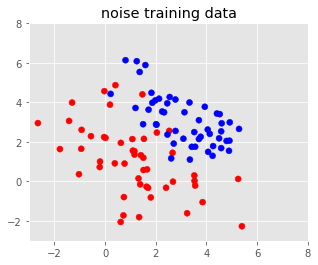

(-3.0, 8.0)

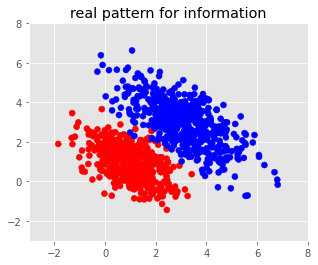

In [41]:
plt.figure(figsize=(5,4))
plt.style.use('ggplot')
plt.scatter(ar[:,0],ar[:,1],c=np.array(['r']*int((ar.shape[0]/2))+['b']*int((ar.shape[0]/2))), )
plt.title('noise training data')
plt.xlim((-3,8))
plt.ylim((-3,8))
plt.show()

plt.figure(figsize=(5,4))
plt.scatter(testAr[:,0],testAr[:,1],c=np.array(['r']*int((testAr.shape[0]/2))+['b']*int((testAr.shape[0]/2))), )
plt.title('real pattern for information')
plt.xlim((-3,8))
plt.ylim((-3,8))

Text(0.5, 0, 'Depth of the tree')

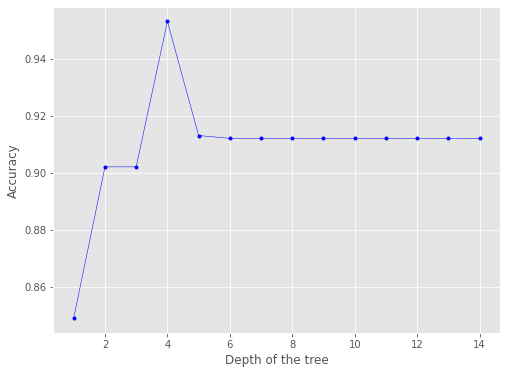

In [42]:
x=ar
y=np.array([0]*int((ar.shape[0]/2))+[1]*int((ar.shape[0]/2)))
plt.figure(figsize=(8,6))
fro,to=1,15
plt.plot(range(fro,to),[returnAccuracy((x,y),(testAr,testy),max_depth=i) for i in range(fro,to)],"b.-",linewidth=0.5)
plt.ylabel("Accuracy")
plt.xlabel("Depth of the tree")

Depth=1


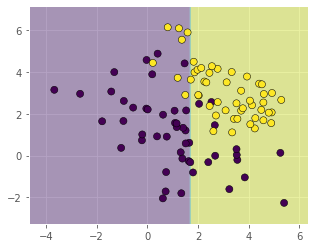

Depth=2


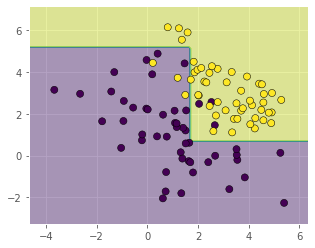

Depth=4


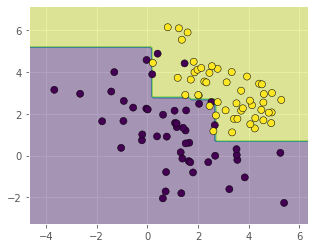

Depth=8


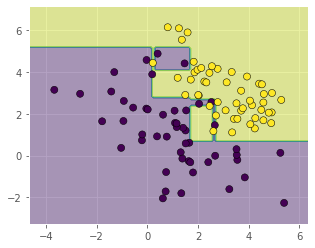

In [43]:
def boundaryExp(d):
  clf=tree.DecisionTreeClassifier(random_state=0,max_depth=d)
  pair=[0,1]
  clf.fit(x[:,pair],y)
  print("Depth={}".format(d))
  plotDecisionBoundary(x,y,pair,clf)
  plt.show()
for i in [1,2,4,8]:
  boundaryExp(i) 

Accuracy of the decision tree on the test set: 

0.902


the confusion matrix is:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


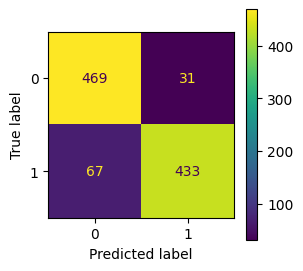

here is the diagram of the tree created to evaluate each sample:


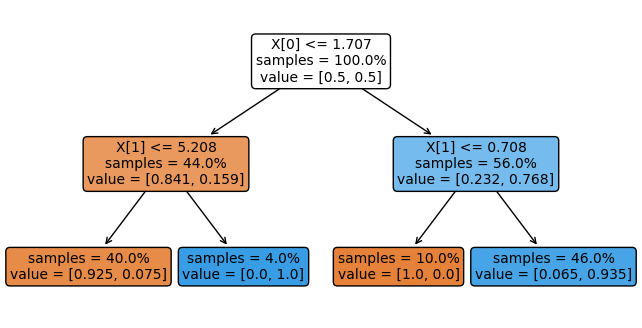

In [44]:
plt.style.use('default')
performExperiment((x,y),(testAr,testy),max_depth=2,drawTree=(8,4))

Accuracy of the decision tree on the test set: 

0.953


the confusion matrix is:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


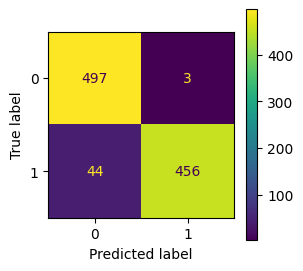

here is the diagram of the tree created to evaluate each sample:


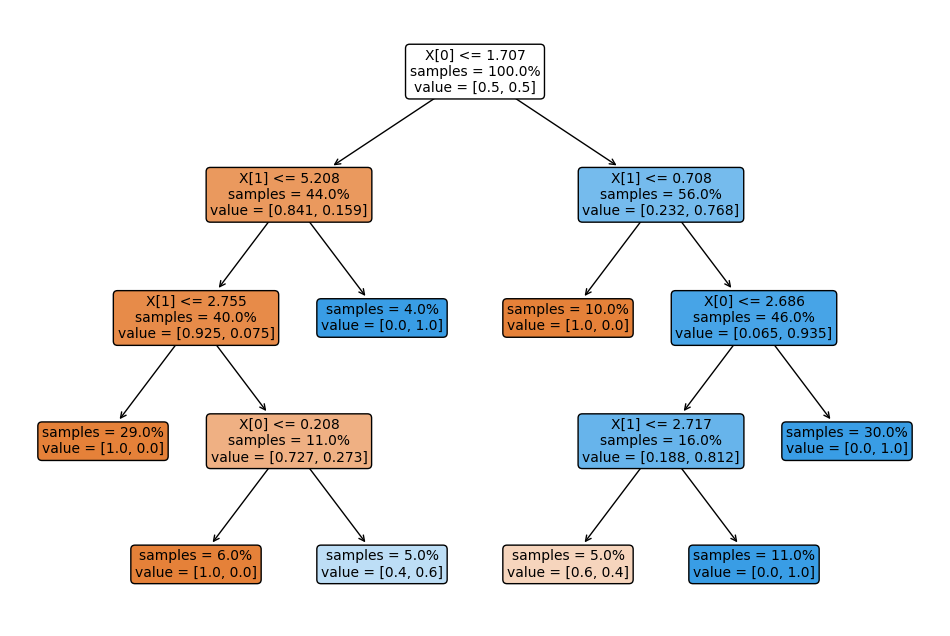

In [45]:
plt.style.use('default')
performExperiment((x,y),(testAr,testy),max_depth=4,drawTree=(12,8))

Accuracy of the decision tree on the test set: 

0.912


the confusion matrix is:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


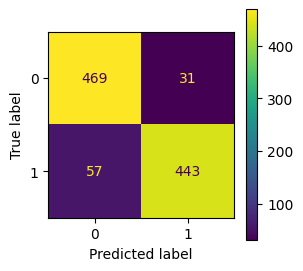

In [46]:
plt.style.use('default')
performExperiment((x,y),(testAr,testy),max_depth=8,drawTree=False)

Now that we have looked at the curse of overfitting and its consequence on the test accuracy, let us try to delve deeper and try to understand that why is it such a serious issue especially for Decision Tree.


## Finding Pattern out of nowhere?

In the following cell we are generating a series of random numbers from a 2-D uncorrelated Gaussian distribution. And then we randomly assign a class to each of these datapoints. i.e There exists no real pattern in the dataset and we are simply giving them a class arbitrarily.

Now let us see how out decision tree does on this when the same set is used as the test set as well.

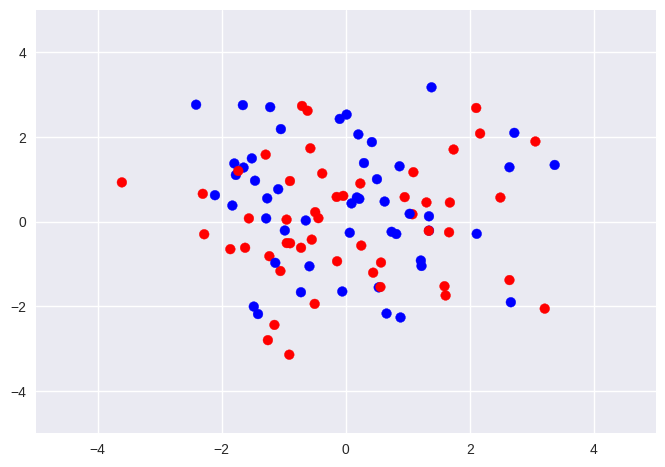

In [47]:
size_decoy=100
np.random.seed(0)
simpleDat=np.random.multivariate_normal((0,0),[[2,0],[0,2]],size=size_decoy)
decoyY=np.random.randint(0,2,size=size_decoy)
cols=["red","blue"]
plt.style.use("seaborn")
plt.scatter(simpleDat[:,0],simpleDat[:,1],c=[cols[i] for i in decoyY])
plt.xlim((-5,5))
plt.ylim((-5,5))
plt.show()

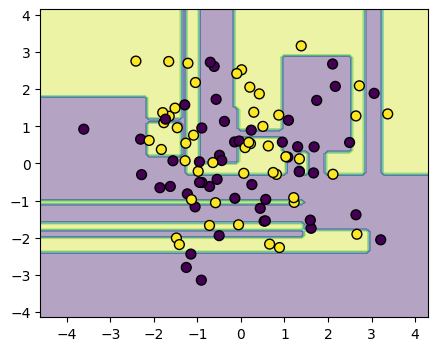

Accuracy of the decision tree on the test set: 

1.000


the confusion matrix is:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


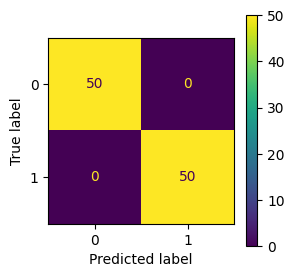

In [48]:
clf=tree.DecisionTreeClassifier(random_state=0)
pair=[0,1]
clf.fit(simpleDat[:,pair],decoyY)
plt.style.use("default")
plotDecisionBoundary(simpleDat,decoyY,pair,clf)
plt.show()

performExperiment((simpleDat,decoyY),(simpleDat,decoyY),drawTree=False)

Wow, we see that our decision tree is able to predict the values in our train set with $100\%$  accuracy!

That is not a surprise if we pay attention to the nature of Decision Trees. They are in fact capable of **adapting completely to any discrete binary function that exists**. This behaviour can be explained using the point they can be seen as nothing but piecewise function definition itself.

Does that mean that our decision tree has learnt something? Let us explore by testing it on another set of points taken from the same distribution.

Accuracy of the decision tree on the test set: 

0.480


the confusion matrix is:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


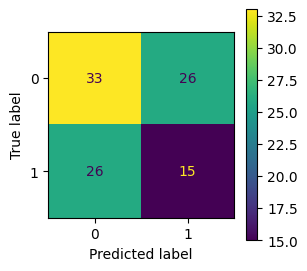

In [49]:
size_decoy=100
np.random.seed(1)
testSimpleDat=np.random.multivariate_normal((0,0),[[2,0],[0,2]],size=size_decoy)
testDecoyY=np.random.randint(0,2,size=size_decoy)
performExperiment((simpleDat,decoyY),(testSimpleDat,testDecoyY),drawTree=False)

We infact see that our decision tree has not learnt much since its accuracy is $48\%$ on a set that it hasn't seen before which is to be expected since there are only 2 classes to predict.

## Experiment on Titanic Dataset

`Reference Dataset taken from: https://www.kaggle.com/c/titanic/data`


The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Our task in rest of today's lab is to use decision trees to predict if a person would be able to survive or not. 

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

In [50]:
os.system("wget https://raw.githubusercontent.com/Foundations-in-Modern-Machine-Learning/course-contents/main/Classification2/data/titanic/train.csv")

0

In [51]:
os.listdir()

['.config', 'train.csv', 'sample_data']

In [52]:
traindf=pd.read_csv("train.csv")

In [53]:
traindf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [54]:
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [55]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
for idx,row in traindf.iterrows():
  if(row["Sex"]=="female"):
    traindf.at[idx,"Sex"]=0
  else:
    traindf.at[idx,"Sex"]=1  

In [57]:
#splitting the dataset
trainset,testset=train_test_split(traindf,random_state=0)

In [58]:
def releventInfo(df):
  x=df.iloc[:,[2,4,5,6,7,9]]
  y=df.iloc[:,1]

  #Preprocessing to handle the missing data using a regressor
  imp=IterativeImputer(max_iter=10,random_state=0)
  imp.fit(x)
  newdf=imp.transform(x)

  return newdf,y.to_numpy()

In [59]:
trainx,trainy=releventInfo(trainset)
testx,testy=releventInfo(testset)

Accuracy of the decision tree on the test set: 

0.816


the confusion matrix is:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


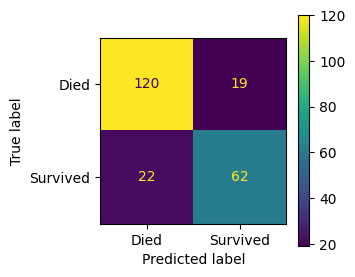

here is the diagram of the tree created to evaluate each sample:


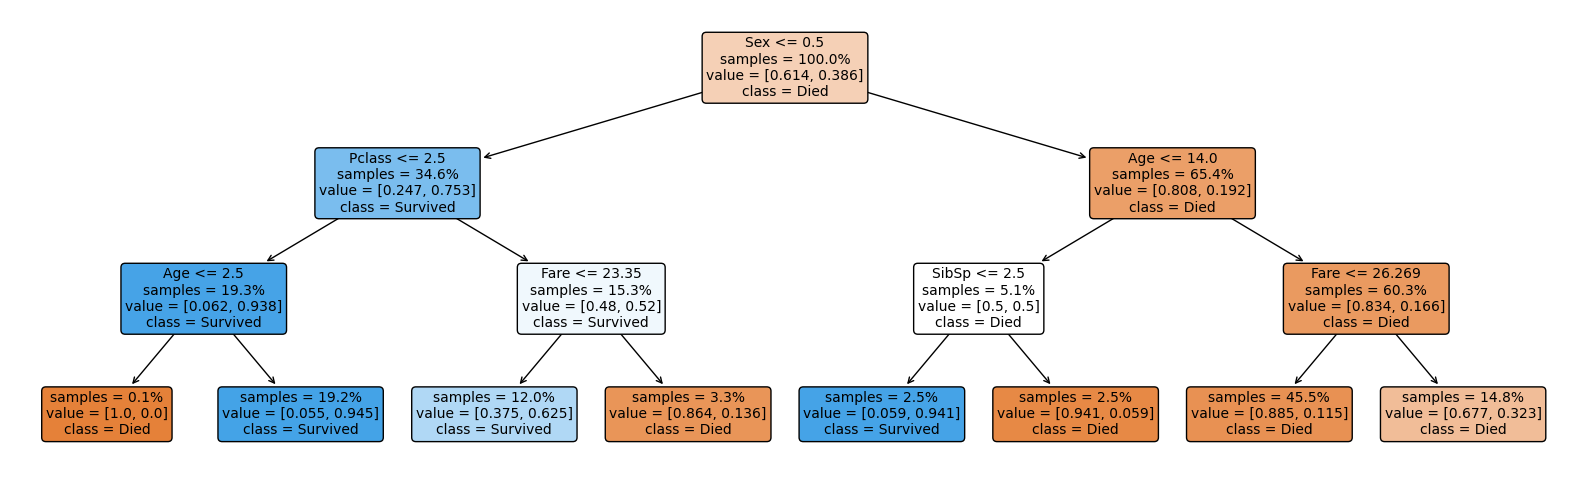

In [60]:
performExperiment((trainx,trainy),(testx,testy),max_depth=3,feature_names=[traindf.columns[i] for i in [2,4,5,6,7,9]],class_names=["Died","Survived"],drawTree=(20,6))

Accuracy of the decision tree on the test set: 

0.821


the confusion matrix is:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


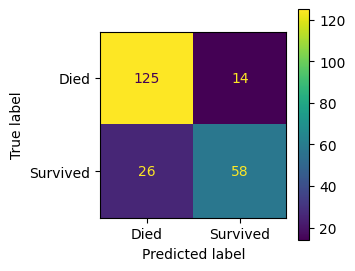

In [61]:
max_depth=6#@param {type:"slider",min:2,max:10}
criterion='gini'#@param ['gini','entropy']
min_samples_to_split=3#@param {type:"slider",min:2,max:20,step:2}
min_samples_in_leaf=1#@param {type:"slider",min:1,max:50}

plt.style.use("default")
performExperiment((trainx,trainy),\
                  (testx,testy),\
                  max_depth=max_depth,\
                  feature_names=[traindf.columns[i] for i in [2,4,5,6,7,9]],\
                  class_names=["Died","Survived"],\
                  min_samples_split=min_samples_to_split,\
                  min_samples_leaf=min_samples_in_leaf,\
                  drawTree=False)

Text(0.5, 0, 'Depth of the tree')

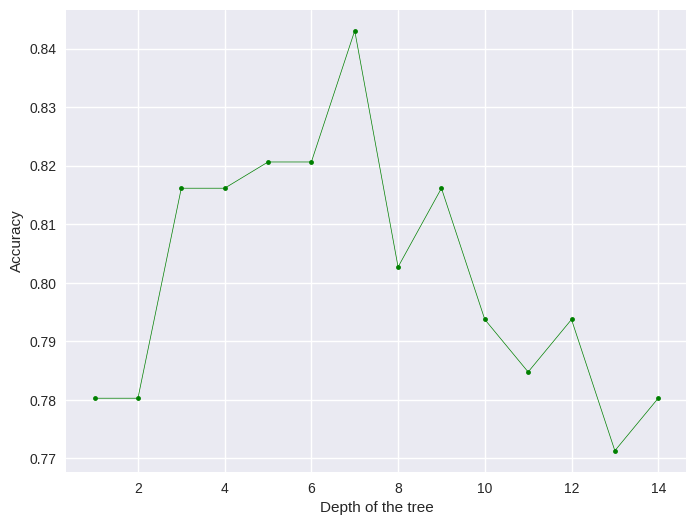

In [62]:
plt.style.use("seaborn")
plt.figure(figsize=(8,6))
fro,to=1,15
plt.plot(range(fro, to), [returnAccuracy((trainx, trainy), (testx, testy), max_depth = i) for i in range(fro, to)], "g.-", linewidth=0.5)
plt.ylabel("Accuracy")
plt.xlabel("Depth of the tree")

## **Section 3 - Random Forests**

- Random Forests as a method to prevent overfitting.

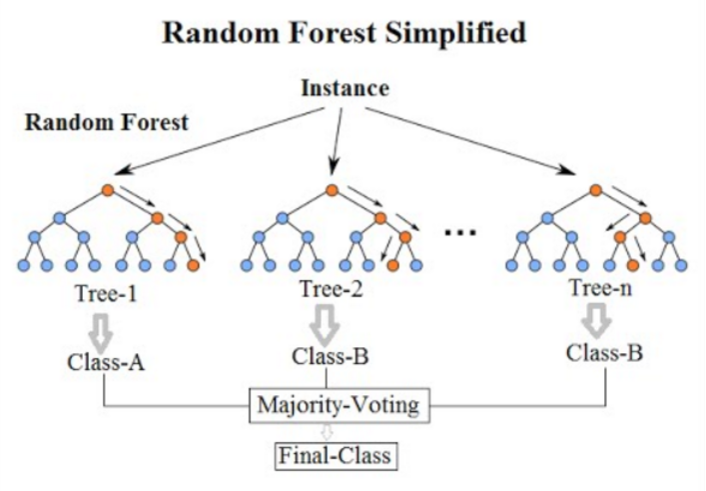

In [75]:
#changing function for section3
def performExperiment(trainset:tuple,testset:tuple,max_depth:int=None,feature_names:list=None,class_names:list=None,criterion="gini",min_samples_split:int=2,min_samples_leaf=1,drawTree=(8,6)):
  #improting decision tree from sklearn
  clf=RandomForestClassifier(max_depth=max_depth,\
                             criterion=criterion,\
                             min_samples_split=min_samples_split,\
                             min_samples_leaf=min_samples_leaf,\
                             random_state=0,\
                             n_estimators=10)
  x_train,y_train=trainset
  x_test,y_test=testset
  clf=clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)

  print("Accuracy of the Random Forest on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred,y_test)))
  print("The confusion matrix is:")
  fig,ax=plt.subplots(figsize=(3,3))
  plot_confusion_matrix(clf,x_test,y_test,display_labels=class_names,ax=ax)
  plt.show()

  if drawTree:
    print("Here is the diagram of the tree created to evaluate each sample:")
    fig,ax=plt.subplots(figsize=drawTree)
    imgObj=tree.plot_tree(clf,filled=True,ax=ax,feature_names=feature_names,class_names=class_names,impurity=False,proportion=True,rounded=True,fontsize=10)
    plt.show()

def returnAccuracy(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1):
  clf = RandomForestClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    random_state = 0,\
                                    n_estimators = 10, \
                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  return accuracy_score(y_pred, y_test)


def returnAccuracyDT(trainSet:tuple,testSet:tuple,max_depth:int=None,feature_names:list=None,class_names:list=None,criterion='gini',min_samples_split:int=2,min_samples_leaf=1):
  clf=tree.DecisionTreeClassifier(max_depth=max_depth,\
                                  criterion=criterion,\
                                  min_samples_split=min_samples_split,\
                                  min_samples_leaf=min_samples_leaf,\
                                  splitter='best',\
                                  random_state=0,\
                                  )
  x_train,y_train=trainSet
  x_test,y_test=testSet

  clf=clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)

  return accuracy_score(y_pred,y_test)

def returnAccuracySvm(trainSet:tuple,testSet:tuple):
  clf=svm.LinearSVC()

  x_train,y_train=trainSet
  x_test,y_test=testSet
  clf=clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)

  return accuracy_score(y_pred,y_test)

def giveAnExample(n:int):
  performExperiment((x_train,y_train),(x_test,y_test),feature_names=iris["feature_names"],class_names=iris["target_names"],max_depth=n)

def plotDecisionBoundary(x,y,pair,clf):
  x_min,x_max=x[:,pair[0]].min()-1,x[:,pair[0]].max()+1
  y_min,y_max=x[:,pair[1]].min()-1,x[:,pair[1]].max()+1
  xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))

  y_pred=clf.predict(np.c_[xx.ravel(),yy.ravel()])
  y_pred=y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx,yy,y_pred,alpha=0.4)
  plt.scatter(x[:,pair[0]],x[:,pair[1]],c=y,s=50,edgecolor='k')
  plt.show()

In [71]:
np.random.seed(0)

ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 50, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 50, )
                    ]\
              )

testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))

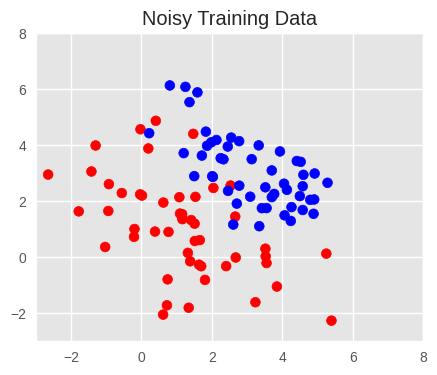

(-3.0, 8.0)

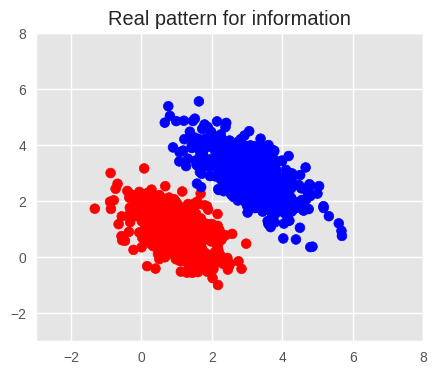

In [72]:
plt.figure(figsize=(5,4))
plt.style.use("ggplot")
plt.scatter(ar[:,0],ar[:,1],c=np.array(["r"]*int((ar.shape[0]/2))+["b"]*int((ar.shape[0]/2))),)
plt.title("Noisy Training Data")
plt.xlim((-3,8))
plt.ylim((-3,8))

plt.show()

plt.figure(figsize=(5,4))
plt.title("Real pattern for information")
plt.scatter(testAr[:,0],testAr[:,1],c=np.array(["r"]*int((testAr.shape[0]/2))+["b"]*int((testAr.shape[0]/2))),)
plt.xlim((-3,8))
plt.ylim((-3,8))

Depth=1


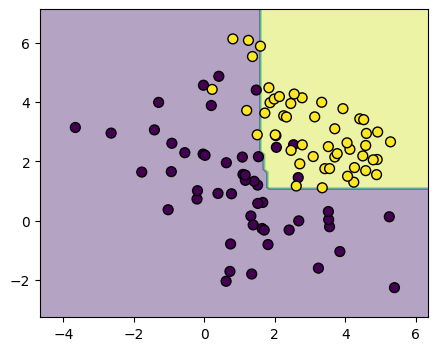

Depth=2


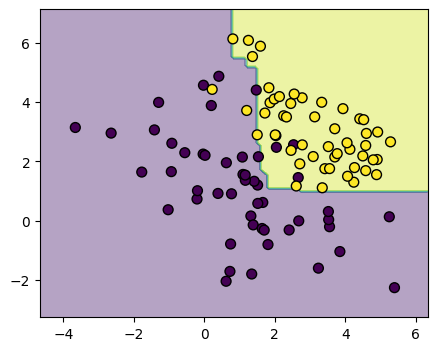

Depth=4


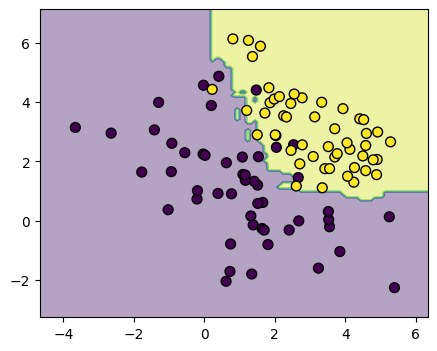

Depth=8


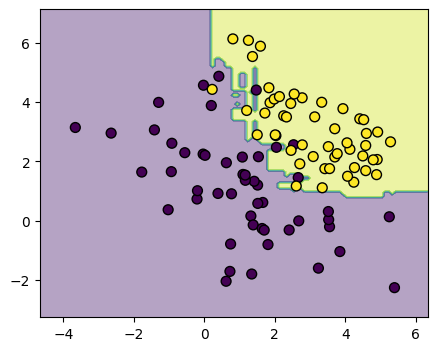

In [73]:
plt.style.use("default")
x=ar
y=np.array([0]*int((ar.shape[0]/2))+[1]*int((ar.shape[0]/2)))

def boundaryExp(d):
  clf=RandomForestClassifier(random_state=0,max_depth=d)
  pair=[0,1]
  clf.fit(x[:,pair],y)
  print("Depth={}".format(d))
  plotDecisionBoundary(x,y,pair,clf)
  plt.show()

for i in [1,2,4,8]:
  boundaryExp(i)

Text(0.5, 0, 'Depth of the tree')

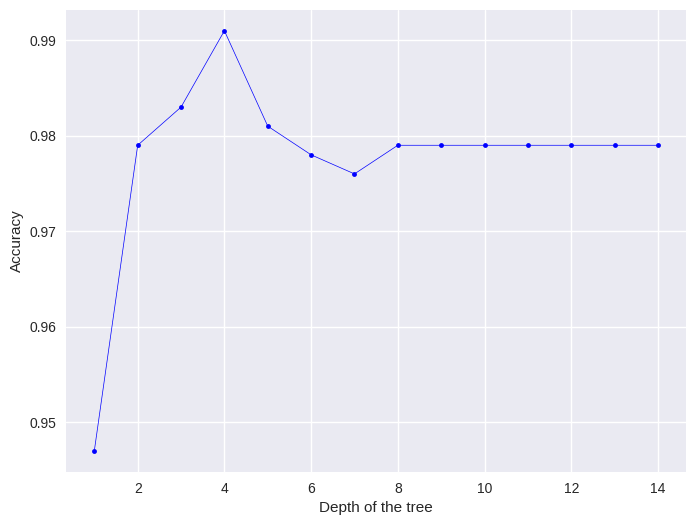

In [76]:
plt.style.use("seaborn")
x=ar
y=np.array([0]*int((ar.shape[0]/2))+[1]*int((ar.shape[0]/2)))

plt.figure(figsize=(8,6))
fro,to=1,15
plt.plot(range(fro, to), [returnAccuracy((X, y), (testAr, testy), max_depth = i) for i in range(fro, to)], "b.-", linewidth=0.5)
plt.ylabel("Accuracy")
plt.xlabel("Depth of the tree")

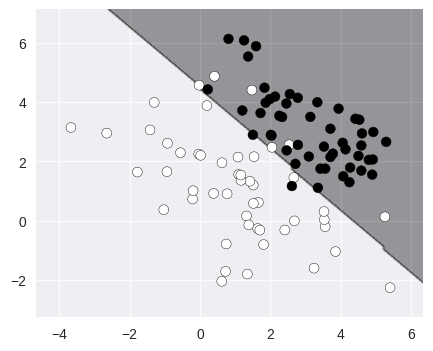

In [77]:
X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))

def boundaryExp() :
  clf = svm.LinearSVC()
  pair = [0, 1]
  clf.fit(X[:, pair], y)
  plotDecisionBoundary(X, y, pair, clf)
  plt.show()


boundaryExp()

In [78]:
returnAccuracySvm((x,y),(testAr,testy))

0.998

## Experiment on Titanic Dataset

`Reference Dataset taken from: https://www.kaggle.com/c/titanic/data`


<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

In [79]:
os.system("wget https://raw.githubusercontent.com/Foundations-in-Modern-Machine-Learning/course-contents/main/Classification2/data/titanic/train.csv")
trainDf = pd.read_csv("train.csv")

In [80]:
os.listdir()

['.config', 'train.csv', 'train.csv.1', 'sample_data']

In [82]:
for idx,row in trainDf.iterrows():
  if(row["Sex"]=="female"):
    trainDf.at[idx,"Sex"]=0
  else:
    trainDf.at[idx,"Sex"]=1
trainSet,testSet=train_test_split(trainDf,random_state=0)

In [83]:
def relevantInfo(df):
  X = df.iloc[:, [2, 4, 5, 6, 7, 9]]
  y = df.iloc[:, 1]

  #Preprocessing to handle the missing data using a regressor
  imp = IterativeImputer(max_iter = 10, random_state=0)
  imp.fit(X)
  newDf = imp.transform(X)

  return newDf , y.to_numpy()

In [84]:
trainX, trainy = relevantInfo(trainSet)
testX, testy = relevantInfo(testSet)

Accuracy of the Random Forest on the test set: 

0.834


The confusion matrix is:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


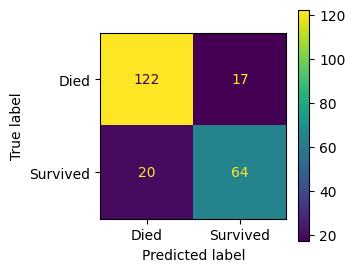

In [85]:
plt.style.use("default")
performExperiment((trainX, trainy), (testX, testy), max_depth = 6, feature_names=[trainDf.columns[i] for i in [2, 4, 5, 6, 7, 9]], class_names=["Died", "Survived"], drawTree=False)

Text(0.5, 0, 'Depth of the tree')

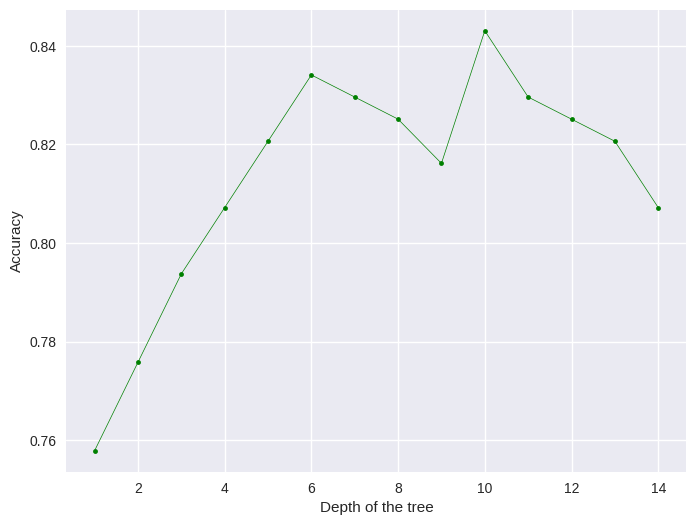

In [86]:
plt.style.use("seaborn")
plt.figure(figsize=(8,6))
fro, to = 1, 15
plt.plot(range(fro, to), [returnAccuracy((trainX, trainy), (testX, testy), max_depth = i) for i in range(fro, to)], "g.-", linewidth=0.5)
plt.ylabel("Accuracy")
plt.xlabel("Depth of the tree")

In [87]:
np.random.seed(0)
testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

def stabilityTest():

  ar = np.vstack(     [\
                      np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 30, ),\
                      np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 30, )
                      ]\
                )

  X = ar
  y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))  

  treeAcc = returnAccuracyDT((X, y), (testAr, testy), max_depth = 4)
  forestAcc = returnAccuracy((X, y), (testAr, testy), max_depth = 4)

  return treeAcc,  forestAcc

treeDat = []
forestDat = []
for i in range(50):
  treeAcc, forestAcc = stabilityTest()
  treeDat.append(treeAcc)
  forestDat.append(forestAcc)


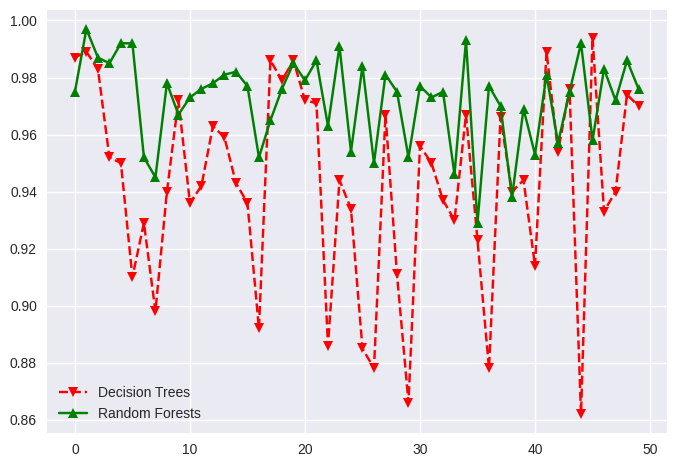

In [88]:
plt.plot(treeDat, "rv--", label="Decision Trees")
plt.plot(forestDat, "g^-", label="Random Forests")
plt.legend()
plt.show()

### Comparing Speed of training of SVMs and Random Forests

Even though SVM's decision boundaries proved to generalize better, we, still have significant motivation to use Ensemble methods like RandomForests over SVMs for the reasons which we will see below:

Lets train a set with 20000 datapoints and train two models.

In [89]:
ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 10000, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 10000, )
                    ]\
              )

X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))

In [90]:
clf = svm.SVC()
startTime = time.time()
clf.fit(X, y)
endTime = time.time()

print("Time taken for SVM: {}".format(endTime-startTime))

clf = RandomForestClassifier(n_estimators=10)
startTime = time.time()
clf.fit(X, y)
endTime = time.time()

print("Time taken for Random Forests: {}".format(endTime-startTime))

Time taken for SVM: 7.761823892593384
Time taken for Random Forests: 0.25097107887268066


In [91]:
#end of lab